In [78]:
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt 
import os 
import cv2 
import numpy as np
import pandas as pd
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [79]:
# Define the categories and image size
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

In [80]:
# Define the data path
data_path = "/kaggle/input/leapgestrecog/leapGestRecog"

In [82]:
#Load the images and their corresponding labels
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                # Resize the images to IMG_SIZE x IMG_SIZE
                resized_img = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                image_data.append([resized_img, class_index])
            except Exception as e:
                print(f"Error reading image - {os.path.join(path, img)}")


In [84]:
# Convert image data to numpy arrays
X = []
y = []

for features, label in image_data:
    X.append(features)
    y.append(label)

In [85]:
# Convert lists to numpy arrays and add channel dimension
X = np.array(X)
X = np.expand_dims(X, axis=-1)  # Add channel dimension
y = np.array(y)

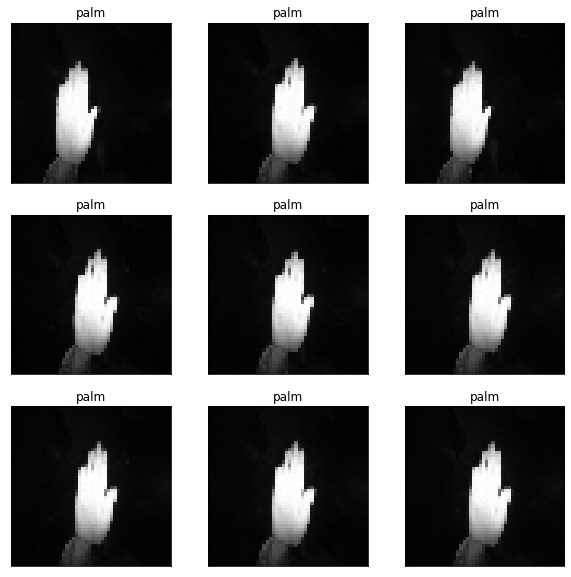

In [86]:
# Visualize some sample images
plt.figure(1, figsize=(10,10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(image_data[i][0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[image_data[i][1]][3:])
plt.show()

In [87]:
# Shuffle the data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

In [88]:
# Normalize the pixel values
X = X / 255.0

In [89]:
# Convert labels into one-hot encoded vectors
from keras.utils import to_categorical
y = to_categorical(y, num_classes=len(CATEGORIES))


In [90]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Define the CNN model architecture
model = keras.Sequential([
    Conv2D(64, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 1)),  # Add channel dimension
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64),
    Activation('relu'),
    Dropout(0.5),
    Dense(len(CATEGORIES)),
    Activation('softmax')
])

In [93]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [94]:
# Train the model on the training data
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)


Epoch 1/10
450/450 [==============================] - 2s 4ms/step - loss: 0.8634 - accuracy: 0.6980 - val_loss: 0.0571 - val_accuracy: 0.9925
Epoch 2/10
450/450 [==============================] - 2s 3ms/step - loss: 0.2101 - accuracy: 0.9238 - val_loss: 0.0138 - val_accuracy: 0.9969
Epoch 3/10
450/450 [==============================] - 2s 3ms/step - loss: 0.1299 - accuracy: 0.9526 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/10
450/450 [==============================] - 2s 3ms/step - loss: 0.1018 - accuracy: 0.9604 - val_loss: 0.0049 - val_accuracy: 0.9987
Epoch 5/10
450/450 [==============================] - 2s 3ms/step - loss: 0.0909 - accuracy: 0.9656 - val_loss: 9.6944e-04 - val_accuracy: 1.0000
Epoch 6/10
450/450 [==============================] - 2s 3ms/step - loss: 0.0735 - accuracy: 0.9695 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 7/10
450/450 [==============================] - 2s 4ms/step - loss: 0.0688 - accuracy: 0.9737 - val_loss: 5.0798e-04 - val_accuracy: 1.000

In [95]:
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

125/125 [==============================] - 0s 2ms/step - loss: 4.7374e-04 - accuracy: 0.9998
Test Accuracy: 0.999750018119812


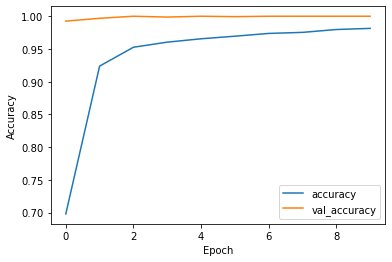

In [96]:
# Visualize the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()